In [2]:
from sklearn.preprocessing import Imputer
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
dict = {'valor' : [120, np.nan, 240],
        'ganancia' : [20, 50, np.nan],
        'impuesto' : [240, 33, np.nan]}

df = pd.DataFrame(data=dict)
df

,valor,ganancia,impuesto
0,120.0,20.0,240.0
1,NaN,50.0,33.0
2,240.0,NaN,NaN


### El Imputer puede usarse en 2 partes: estimar (fit) y transformar (transform)
- **Al aplicar el método fit, solo se habrá hecho una estimación sin ninguna transformación**

- **Por defecto el método será aplicar la media para imputar los datos faltantes**

In [3]:
imputer = Imputer ()
imputer.fit(df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [4]:
dict = {'valor' : [10, np.nan, np.nan],
        'ganancia' : [np.nan, 50, np.nan],
        'impuesto' : [2, 12, 24]}
df2 = pd.DataFrame(data=dict)
df2

,valor,ganancia,impuesto
0,10.0,NaN,2
1,NaN,50.0,12
2,NaN,NaN,24


### El imputer ya ha estimado la forma como debe completar los datos faltantes, puede ser aplicado a otro objeto (en este caso un DataFrame) sin necesidad de que se realice la estimación nuevamente.

In [5]:
imputer.transform(df2)

array([[ 10.,  35.,   2.],
       [180.,  50.,  12.],
       [180.,  35.,  24.]])

### Los valores faltantes en las columnas son completados usando la media asignada al imputer en la etapa de estimación (fit), por lo tanto: 
- Columna valor: valores faltantes 2, promedio estimado (fit) = 180
- Columna ganancia: valores faltantes 2, promedio estimado (fit) = 35

## Regresión Lineal

In [6]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')

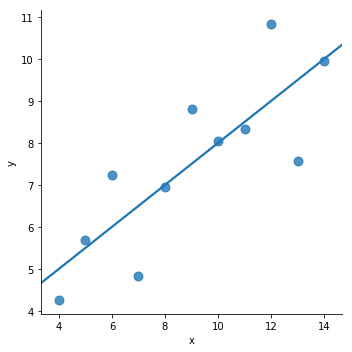

In [7]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='I'"), ci=None, scatter_kws={"s": 80})

### Ecuación Normal

In [8]:
# genera valores lineales aleatorios
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1) 

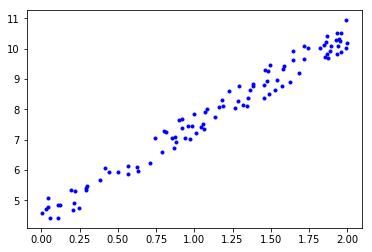

In [10]:
plt.plot(X, Y, 'b.')

### Paréntesis (
**Numpy.c_ : Translates slice objects to concatenation along the second axis:**

In [11]:
np.array([1,2,3])

array([1, 2, 3])

In [12]:
np.c_[np.array([1,2,3])]

array([[1],
       [2],
       [3]])

In [13]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
np.c_[np.array([1,2,3]), np.array([4,5,6]), np.array([7,8,9])]

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

### )

In [15]:
X_b = np.c_[np.ones((100,1)), X]

In [16]:
X_b[:5]


array([[1.        , 0.05745569],
       [1.        , 1.74480514],
       [1.        , 1.36706938],
       [1.        , 0.85405471],
       [1.        , 0.38148149]])

## Linear algebra (numpy.linalg)
- **numpy.linalg.inv(a)**: Compute the (multiplicative) inverse of a matrix.
- **dot** : product of two arrays.

In [17]:
# Ecuación Normal
mejores_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
mejores_params

array([[4.49860714],
       [2.97436895]])

In [18]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [19]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [20]:
y_predict_normal = X_new_b.dot(mejores_params)
y_predict_normal

array([[ 4.49860714],
       [10.44734504]])

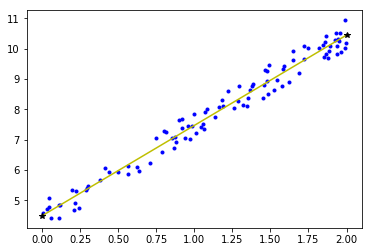

In [21]:
plt.plot(X, Y, "b.")
plt.plot(X_new, y_predict_normal, "y-")
plt.plot(X_new, y_predict_normal, "k*")

### Regresión Lineal

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_predict = lin_reg.predict(X_new)

### Gradiente Descendiente

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [25]:
sgd_reg.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [26]:
sgd_reg_y_predict = sgd_reg.predict(X_new)

**Graficando las diferentes predicciones**

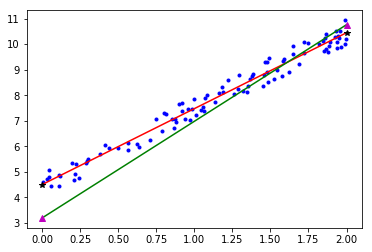

In [27]:
plt.plot(X, Y, 'b.')
plt.plot(X_new, y_predict, 'r-')
plt.plot(X_new, y_predict, 'k*')
plt.plot(X_new, sgd_reg_y_predict, 'g-')
plt.plot(X_new, sgd_reg_y_predict, 'm^')

## Decision Trees

In [28]:
df = pd.DataFrame({"peso":[0.2, 0.3, 0.4, 0.4, 0.6, 0.4],
                   "precio":[2,4, 3, 5, 4,3],
                   "nombre":['manzana', 'manzana','naranja','manzana','naranja','manzana'] })

In [29]:
df

,peso,precio,nombre
0,0.2,2,manzana
1,0.3,4,manzana
2,0.4,3,naranja
3,0.4,5,manzana
4,0.6,4,naranja
5,0.4,3,manzana


**El DataFrame contiene dos variables numéricas y una categórica, en este caso se van a usar las variable snuméricas _precio_ y _peso_, para predecir que tipo de fruta es**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [35]:
# definir inputs y output
X = df[['peso', 'precio']]
y = df['nombre']

In [36]:
classifier = DecisionTreeClassifier()
model = classifier.fit(X, y)

In [49]:
classifier.predict([[0.2, 3.4]])

array(['manzana'], dtype=object)

- **export_graphviz:** exports a decision tree in DOT format
- **graphViz:** is a representation of a decision tree in **DOT** format (DOT is a graphic description language)
- **pydotplus:** is a Python interface to GraphViz's Dot language

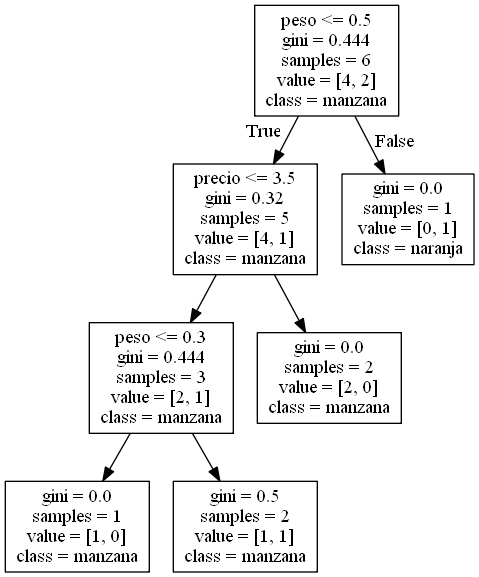

In [43]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=['peso', 'precio'],
                                class_names=['manzana','naranja'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Regresión: predicción de valores contínuos
**En este caso el árbol de decisión va a predecir un valor contínuo (diámetro de una fruta), en base al peso y precio**

In [50]:
df = pd.DataFrame({"peso":[0.2, 0.3, 0.4, 0.4, 0.6, 0.4],
                   "precio":[2,4, 3, 5, 4,3],
                   "diametro":[0.2,0.4, 0.3, 0.5, 0.4,0.3] })
df

,peso,precio,diametro
0,0.2,2,0.2
1,0.3,4,0.4
2,0.4,3,0.3
3,0.4,5,0.5
4,0.6,4,0.4
5,0.4,3,0.3


In [53]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
X = df[['peso', 'precio']]
y = df['diametro']
classifier.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
classifier.predict([[0.7, 6]])

array([0.5])

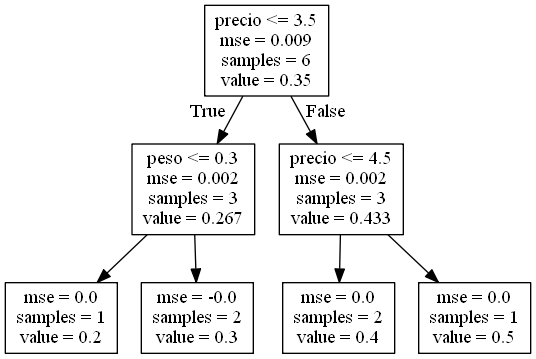

In [58]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['peso', 'precio'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# KNN k-Nearest Neighbours
**Permite clasificar elementos de acuerdo a la distancia con los k elementos cercanos**

In [59]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [60]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
#creates a random ordering into the indexes dataset
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [64]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Visualización KNN

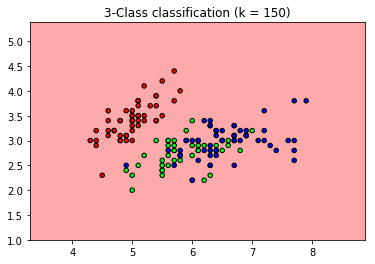

In [67]:
# Ejemplo tomado de scikit-learn  
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 150

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    # we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))

plt.show()

# train_test_split

**Parameters:**

- **arrays:** allowed inputs ar elists, numpy arrays, scipy-sparse matrices or pandas DataFrames
- **test_size:** default 0.25
- **shuffle:** Whether or not to shuffle data before splitting
- **stratify:** data is split in a stratified fashion (it keeps the relationship between train/test class labels amounts)

In [3]:
from sklearn.model_selection import train_test_split

In [69]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [71]:
list(y)

[0, 1, 2, 3, 4]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [74]:
y_train

[2, 0, 3]

In [75]:
X_test

array([[2, 3],
       [8, 9]])

In [76]:
y_test

[1, 4]

In [77]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

### Eligiendo un modelo - validando el error del modelo

In [4]:
import warnings
warnings.filterwarnings('ignore')
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
X_train.shape

(75, 1)

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

**Calculando las predicciones usando el dataset de _entrenamiento_**

In [18]:
lin_reg_predict = lin_reg.predict(X_train)
sgd_reg_predict = sgd_reg.predict(X_train)
tree_reg_predict = tree_reg.predict(X_train)

**Calculando el Mean Squared Error**

In [19]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train, lin_reg_predict)
sgd_mse = mean_squared_error(y_train, sgd_reg_predict)
tree_mse = mean_squared_error(y_train, tree_reg_predict)

In [24]:
print("RMSE Linear Regression: ", np.sqrt(lin_mse))
print("RMSE Linear Regression Gradient Descent: ", np.sqrt(sgd_mse))
print("RMSE Decision Tree:", np.sqrt(tree_mse))

RMSE Linear Regression:  0.8805448198770417
RMSE Linear Regression Gradient Descent:  1.1253078824110163
RMSE Decision Tree: 0.0


**En este caso aparentemente el árbol de decisión predice perfectamente obteniendo un error de 0.0
Pero el entrenamiento se ha hecho con el dataset de _ENTRENAMIENTO_ por lo caul es probable que incurramos en overfitting
es decir, el modelo se ajusta perfectamente a los datos de entrenamiento, y al ser evaluado con los datos de entrenamiento _y_train_
este funcione perfectamente para este dataset, pero falle con un dataset de prueba**

**calculamos ahora con los datos de prueba:**

In [25]:
lin_reg_predict = lin_reg.predict(X_test)
sgd_reg_predict = sgd_reg.predict(X_test)
tree_reg_predict = tree_reg.predict(X_test)

In [26]:
##Calculamos el MSE
lin_mse = mean_squared_error(y_test, lin_reg_predict)
sgd_mse = mean_squared_error(y_test, sgd_reg_predict)
tree_mse = mean_squared_error(y_test, tree_reg_predict)

In [27]:
print("RMSE Linear Regression: ", np.sqrt(lin_mse))
print("RMSE Linear Regression Gradient Descent: ", np.sqrt(sgd_mse))
print("RMSE Decision Tree:", np.sqrt(tree_mse))

RMSE Linear Regression:  1.133805687452737
RMSE Linear Regression Gradient Descent:  1.1027007632925663
RMSE Decision Tree: 1.2822086815538118


**La predicción con LinearRegression y DecisionTree tuvo resultados peores, mientras tanto GradientDescent mejoró**